In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def read_df(url, sep):
    return pd.read_csv(url, sep = ";")

In [3]:
results = read_df('./iris.csv', ';')
results

,gp_plot_data,sol_train_accuracy,sol_validation_accuracy,sol_test_accuracy,sol_nn_architecture,sol_model_name,sol_plot_data,exec_time
0,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0109,\\""...",0.914286,0.933333,0.933333,4:6:3,../results/models/iris_model_0.h5,"[{\epoch\"":1,\""value\"":1.0492,\""metric\"":\""los...",17.745562
1,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.1198,\\""...",0.352381,0.333333,0.200000,4:3:2:2:3,../results/models/iris_model_1.h5,"[{\epoch\"":1,\""value\"":1.2107,\""metric\"":\""los...",16.082831
2,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0032,\\""...",0.342857,0.300000,0.333333,4:4:3,../results/models/iris_model_2.h5,"[{\epoch\"":1,\""value\"":1.2879,\""metric\"":\""los...",15.697432
3,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":0.9816,\\""...",0.971429,0.933333,1.000000,4:9:3,../results/models/iris_model_3.h5,"[{\epoch\"":1,\""value\"":4.0068,\""metric\"":\""los...",16.269020
4,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0068,\\""...",0.857143,0.800000,0.800000,4:3:2:1:3:3,../results/models/iris_model_4.h5,"[{\epoch\"":1,\""value\"":4.5283,\""metric\"":\""los...",15.348464
5,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0019,\\""...",0.676190,0.733333,0.666667,4:7:3,../results/models/iris_model_5.h5,"[{\epoch\"":1,\""value\"":2.8119,\""metric\"":\""los...",15.842743
6,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.046,\\""b...",0.657143,0.700000,0.666667,4:4:3,../results/models/iris_model_6.h5,"[{\epoch\"":1,\""value\"":1.0616,\""metric\"":\""los...",16.508496
7,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0033,\\""...",0.752381,0.766667,0.866667,4:9:3,../results/models/iris_model_7.h5,"[{\epoch\"":1,\""value\"":1.7144,\""metric\"":\""los...",16.082256
8,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":1.0377,\\""...",0.352381,0.333333,0.200000,4:7:3,../results/models/iris_model_8.h5,"[{\epoch\"":1,\""value\"":1.1403,\""metric\"":\""los...",18.551145
9,"[[\[{\\""gen_no\\"":1,\\""pop_train\\"":0.9682,\\""...",0.352381,0.333333,0.200000,4:6:3,../results/models/iris_model_9.h5,"[{\epoch\"":1,\""value\"":1.0986,\""metric\"":\""los...",16.852984


-------------------------------------------------------------------------
----------- STARTING 0 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:6:3
2. ACCURACY OVER THE TRAIN DATA: 0.914285715421041
3. ACCURACY OVER THE VALIDATION DATA: 0.933333337306976
4. ACCURACY OVER THE TEST DATA: 0.933333337306976
5. EXECUTION TIME (IN MINUTES) 17.7455620010694
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


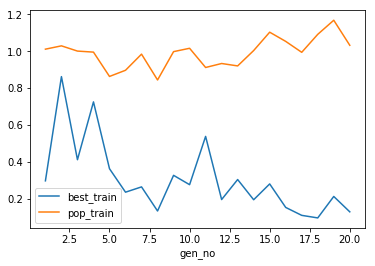

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


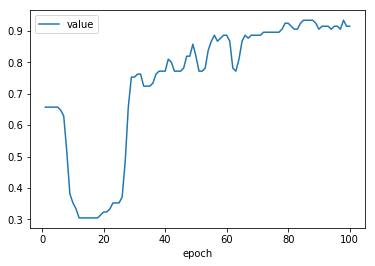

8. EVOLUTION OF THE LOSS OF THE SOLUTION


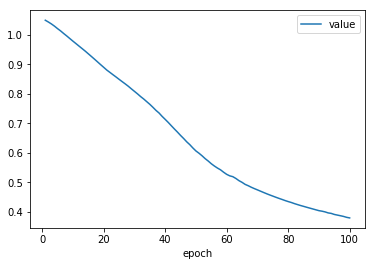

-------------------------------------------------------------------------
----------- STARTING 1 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:3:2:2:3
2. ACCURACY OVER THE TRAIN DATA: 0.352380952522868
3. ACCURACY OVER THE VALIDATION DATA: 0.3333333432674411
4. ACCURACY OVER THE TEST DATA: 0.200000002980232
5. EXECUTION TIME (IN MINUTES) 16.082830834388698
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


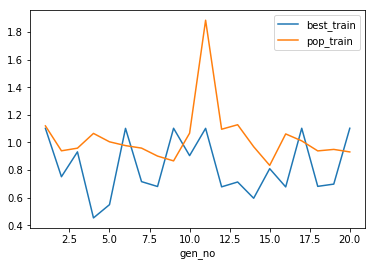

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


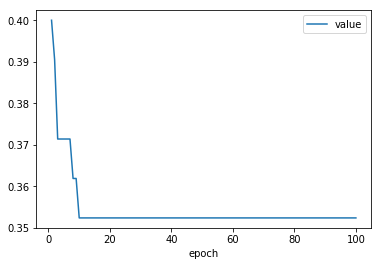

8. EVOLUTION OF THE LOSS OF THE SOLUTION


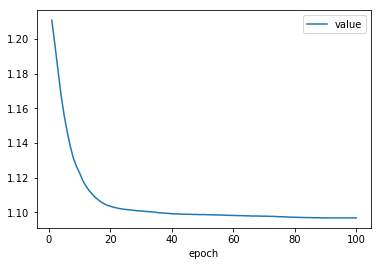

-------------------------------------------------------------------------
----------- STARTING 2 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:4:3
2. ACCURACY OVER THE TRAIN DATA: 0.342857143708638
3. ACCURACY OVER THE VALIDATION DATA: 0.30000001192092896
4. ACCURACY OVER THE TEST DATA: 0.3333333432674411
5. EXECUTION TIME (IN MINUTES) 15.6974317471186
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


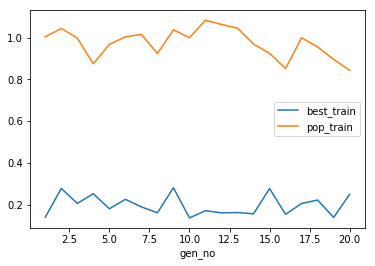

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


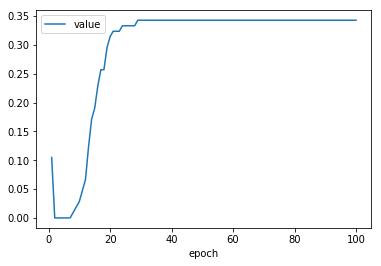

8. EVOLUTION OF THE LOSS OF THE SOLUTION


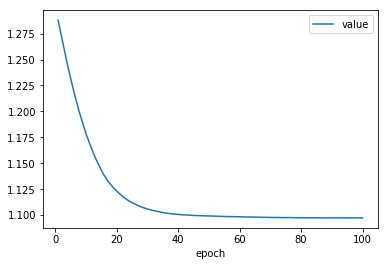

-------------------------------------------------------------------------
----------- STARTING 3 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:9:3
2. ACCURACY OVER THE TRAIN DATA: 0.9714285714285709
3. ACCURACY OVER THE VALIDATION DATA: 0.933333337306976
4. ACCURACY OVER THE TEST DATA: 1.0
5. EXECUTION TIME (IN MINUTES) 16.269019583861
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


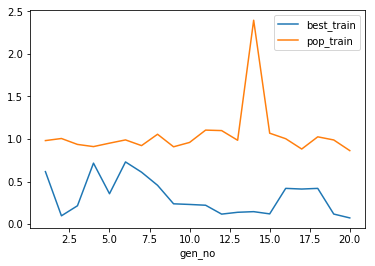

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


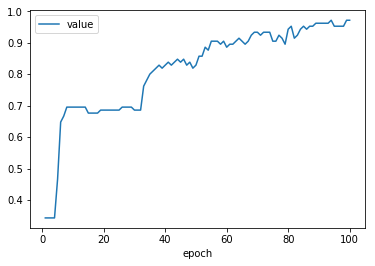

8. EVOLUTION OF THE LOSS OF THE SOLUTION


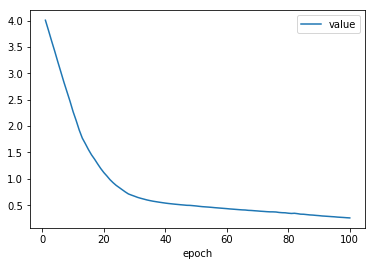

-------------------------------------------------------------------------
----------- STARTING 4 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:3:2:1:3:3
2. ACCURACY OVER THE TRAIN DATA: 0.85714285771052
3. ACCURACY OVER THE VALIDATION DATA: 0.8000000119209291
4. ACCURACY OVER THE TEST DATA: 0.8000000119209291
5. EXECUTION TIME (IN MINUTES) 15.348464250564598
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


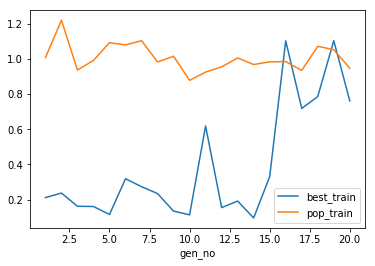

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


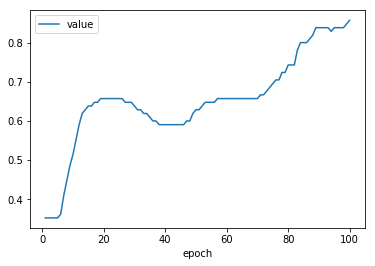

8. EVOLUTION OF THE LOSS OF THE SOLUTION


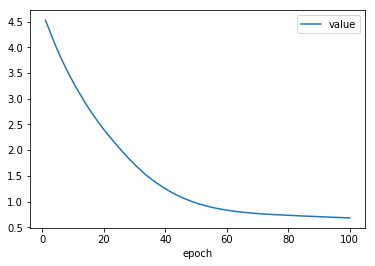

-------------------------------------------------------------------------
----------- STARTING 5 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:7:3
2. ACCURACY OVER THE TRAIN DATA: 0.6761904773258031
3. ACCURACY OVER THE VALIDATION DATA: 0.7333333492279049
4. ACCURACY OVER THE TEST DATA: 0.6666666865348821
5. EXECUTION TIME (IN MINUTES) 15.8427431344986
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


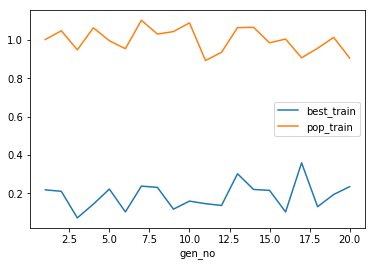

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


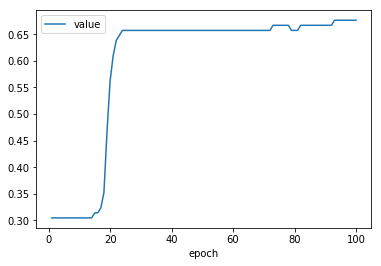

8. EVOLUTION OF THE LOSS OF THE SOLUTION


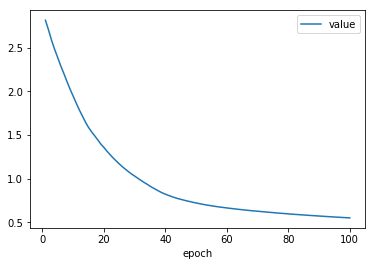

-------------------------------------------------------------------------
----------- STARTING 6 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:4:3
2. ACCURACY OVER THE TRAIN DATA: 0.657142858845847
3. ACCURACY OVER THE VALIDATION DATA: 0.699999988079071
4. ACCURACY OVER THE TEST DATA: 0.6666666865348821
5. EXECUTION TIME (IN MINUTES) 16.508495982488
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


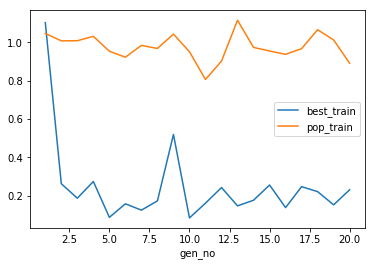

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


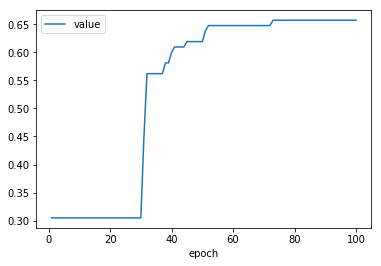

8. EVOLUTION OF THE LOSS OF THE SOLUTION


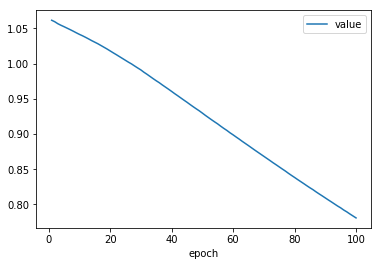

-------------------------------------------------------------------------
----------- STARTING 7 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:9:3
2. ACCURACY OVER THE TRAIN DATA: 0.752380954083942
3. ACCURACY OVER THE VALIDATION DATA: 0.7666666507720951
4. ACCURACY OVER THE TEST DATA: 0.866666674613953
5. EXECUTION TIME (IN MINUTES) 16.0822563330332
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


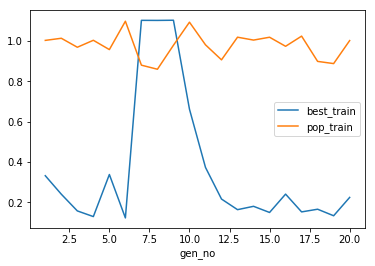

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


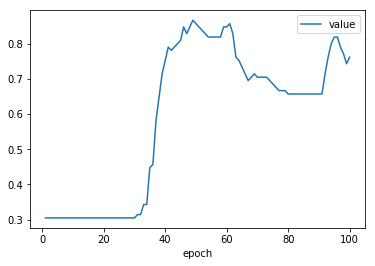

8. EVOLUTION OF THE LOSS OF THE SOLUTION


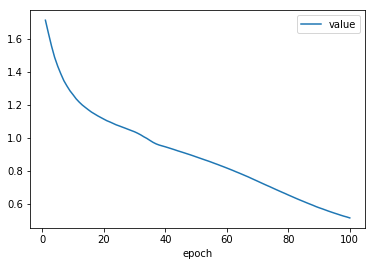

-------------------------------------------------------------------------
----------- STARTING 8 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:7:3
2. ACCURACY OVER THE TRAIN DATA: 0.352380952522868
3. ACCURACY OVER THE VALIDATION DATA: 0.3333333432674411
4. ACCURACY OVER THE TEST DATA: 0.200000002980232
5. EXECUTION TIME (IN MINUTES) 18.5511451005936
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


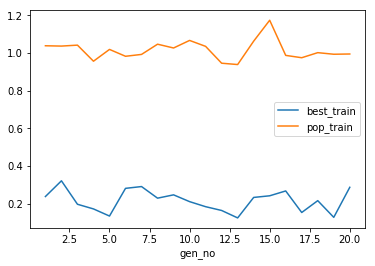

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


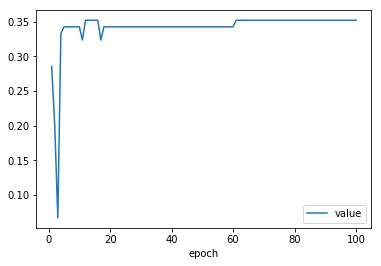

8. EVOLUTION OF THE LOSS OF THE SOLUTION


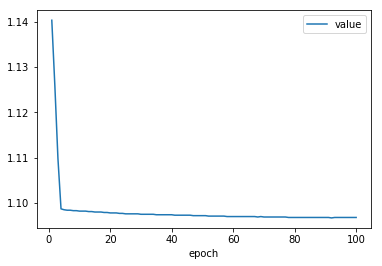

-------------------------------------------------------------------------
----------- STARTING 9 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:6:3
2. ACCURACY OVER THE TRAIN DATA: 0.352380952522868
3. ACCURACY OVER THE VALIDATION DATA: 0.3333333432674411
4. ACCURACY OVER THE TEST DATA: 0.200000002980232
5. EXECUTION TIME (IN MINUTES) 16.852983884016698
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


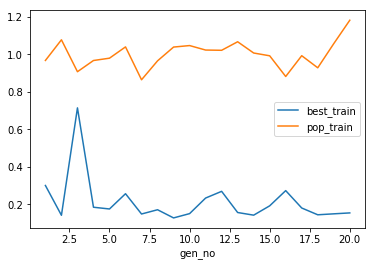

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


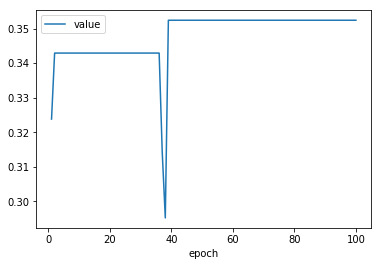

8. EVOLUTION OF THE LOSS OF THE SOLUTION


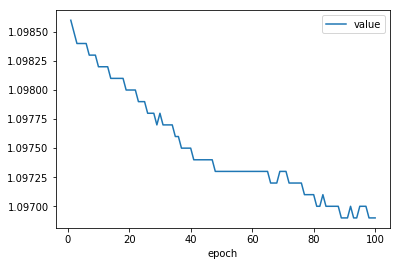

-------------------------------------------------------------------------
----------- STARTING 10 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:4:3
2. ACCURACY OVER THE TRAIN DATA: 0.5714285717124029
3. ACCURACY OVER THE VALIDATION DATA: 0.5666666626930239
4. ACCURACY OVER THE TEST DATA: 0.6000000238418579
5. EXECUTION TIME (IN MINUTES) 15.7803268154462
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


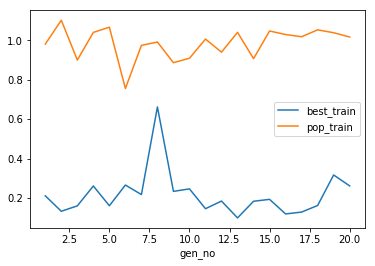

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


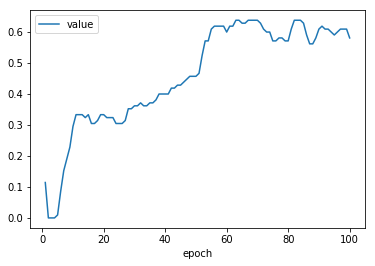

8. EVOLUTION OF THE LOSS OF THE SOLUTION


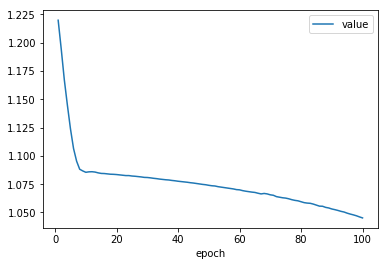

-------------------------------------------------------------------------
----------- STARTING 11 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:5:3
2. ACCURACY OVER THE TRAIN DATA: 0.33333333347524896
3. ACCURACY OVER THE VALIDATION DATA: 0.3666666746139529
4. ACCURACY OVER THE TEST DATA: 0.266666680574417
5. EXECUTION TIME (IN MINUTES) 16.069174651304902
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


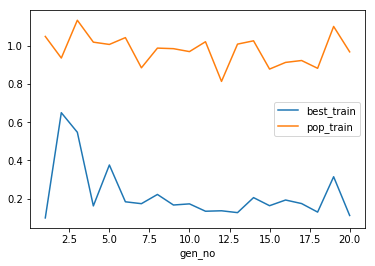

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


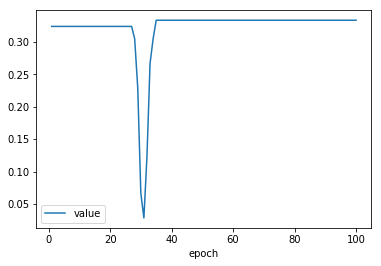

8. EVOLUTION OF THE LOSS OF THE SOLUTION


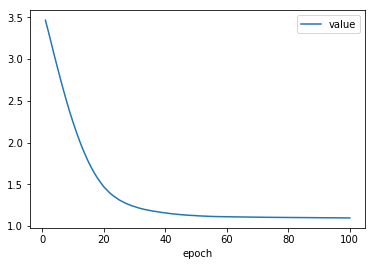

-------------------------------------------------------------------------
----------- STARTING 12 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:5:3
2. ACCURACY OVER THE TRAIN DATA: 0.466666666950498
3. ACCURACY OVER THE VALIDATION DATA: 0.633333325386047
4. ACCURACY OVER THE TEST DATA: 0.466666668653488
5. EXECUTION TIME (IN MINUTES) 16.2489156325658
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


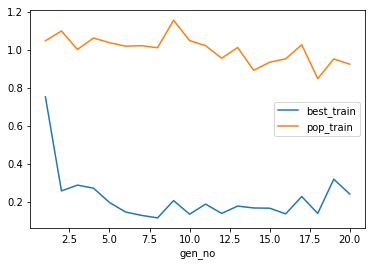

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


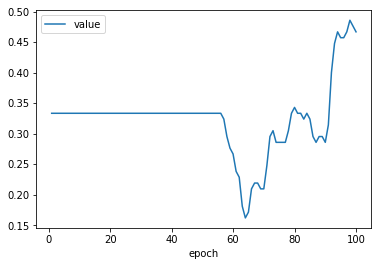

8. EVOLUTION OF THE LOSS OF THE SOLUTION


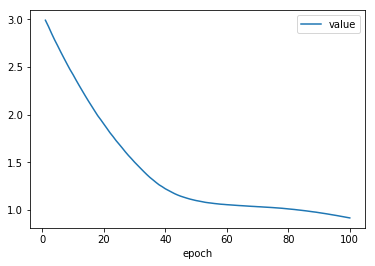

-------------------------------------------------------------------------
----------- STARTING 13 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:5:3
2. ACCURACY OVER THE TRAIN DATA: 0.3714285715704871
3. ACCURACY OVER THE VALIDATION DATA: 0.43333333730697604
4. ACCURACY OVER THE TEST DATA: 0.266666680574417
5. EXECUTION TIME (IN MINUTES) 16.7683414697647
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


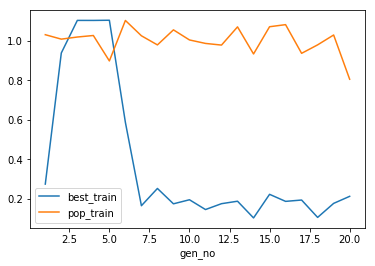

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


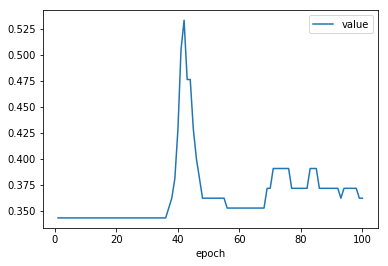

8. EVOLUTION OF THE LOSS OF THE SOLUTION


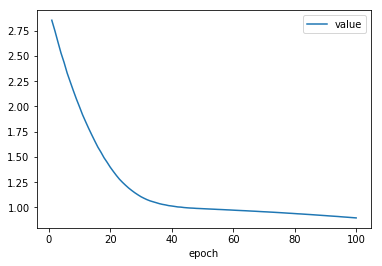

-------------------------------------------------------------------------
----------- STARTING 14 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:6:3
2. ACCURACY OVER THE TRAIN DATA: 0.361904762046678
3. ACCURACY OVER THE VALIDATION DATA: 0.400000005960464
4. ACCURACY OVER THE TEST DATA: 0.266666680574417
5. EXECUTION TIME (IN MINUTES) 17.090383501847597
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


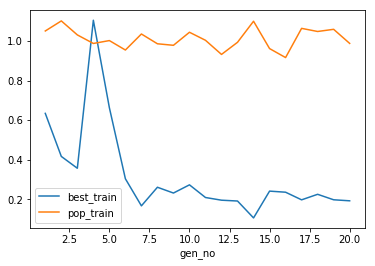

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


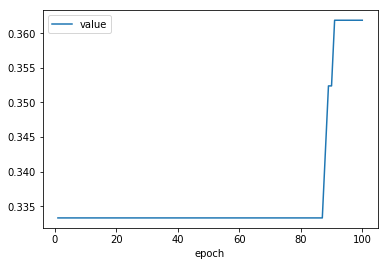

8. EVOLUTION OF THE LOSS OF THE SOLUTION


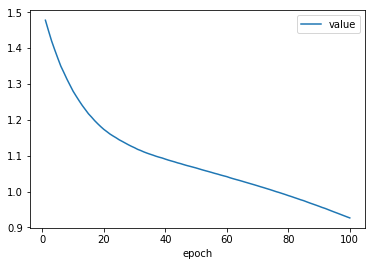

-------------------------------------------------------------------------
----------- STARTING 15 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:3:3
2. ACCURACY OVER THE TRAIN DATA: 0.6857142879849389
3. ACCURACY OVER THE VALIDATION DATA: 0.7666666507720951
4. ACCURACY OVER THE TEST DATA: 0.533333361148834
5. EXECUTION TIME (IN MINUTES) 16.028319700559003
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


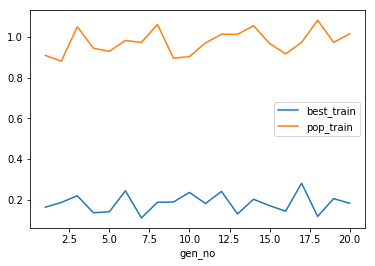

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


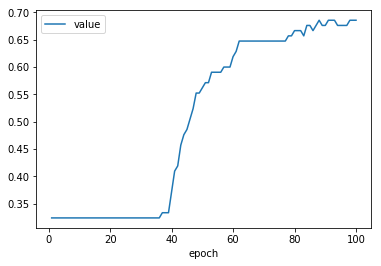

8. EVOLUTION OF THE LOSS OF THE SOLUTION


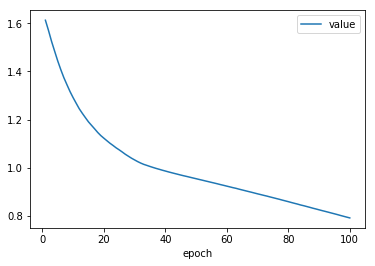

-------------------------------------------------------------------------
----------- STARTING 16 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:4:3
2. ACCURACY OVER THE TRAIN DATA: 0.819047620750609
3. ACCURACY OVER THE VALIDATION DATA: 0.8999999761581421
4. ACCURACY OVER THE TEST DATA: 0.8000000119209291
5. EXECUTION TIME (IN MINUTES) 17.7131970802943
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


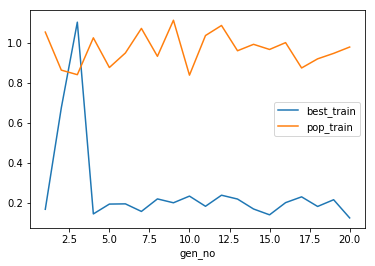

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


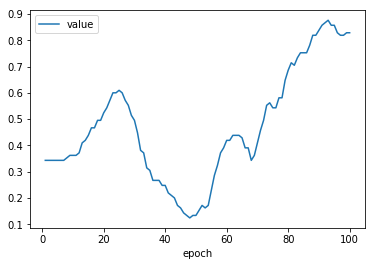

8. EVOLUTION OF THE LOSS OF THE SOLUTION


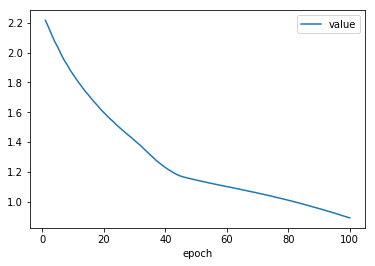

-------------------------------------------------------------------------
----------- STARTING 17 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:3:2:1:4:3
2. ACCURACY OVER THE TRAIN DATA: 0.85714285771052
3. ACCURACY OVER THE VALIDATION DATA: 0.8000000119209291
4. ACCURACY OVER THE TEST DATA: 0.7333333492279049
5. EXECUTION TIME (IN MINUTES) 17.0828774491946
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


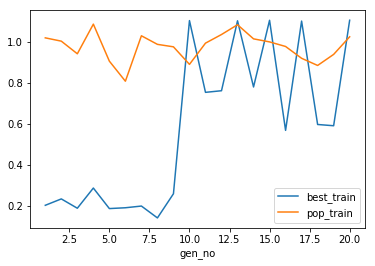

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


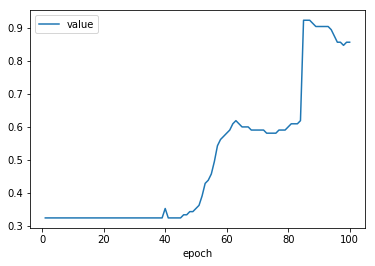

8. EVOLUTION OF THE LOSS OF THE SOLUTION


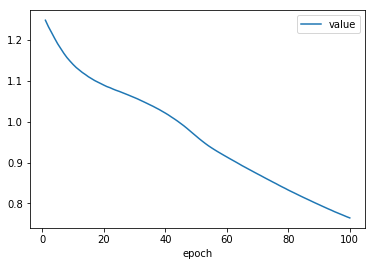

-------------------------------------------------------------------------
----------- STARTING 18 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:6:3
2. ACCURACY OVER THE TRAIN DATA: 0.65714285941351
3. ACCURACY OVER THE VALIDATION DATA: 0.7666666507720951
4. ACCURACY OVER THE TEST DATA: 0.533333361148834
5. EXECUTION TIME (IN MINUTES) 16.7710432807604
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


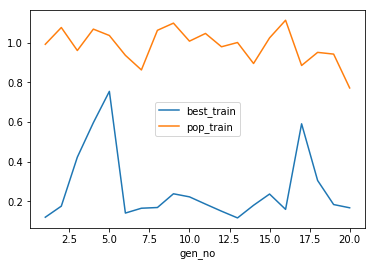

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


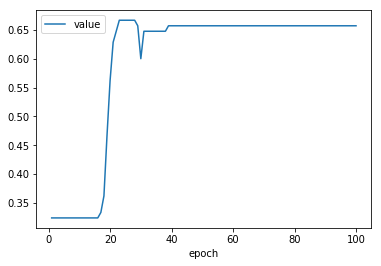

8. EVOLUTION OF THE LOSS OF THE SOLUTION


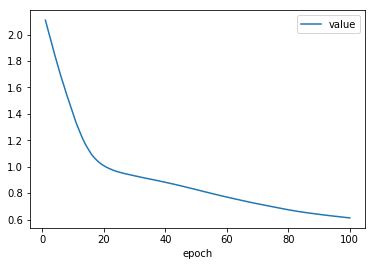

-------------------------------------------------------------------------
----------- STARTING 19 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:6:3
2. ACCURACY OVER THE TRAIN DATA: 0.9523809523809521
3. ACCURACY OVER THE VALIDATION DATA: 0.933333337306976
4. ACCURACY OVER THE TEST DATA: 1.0
5. EXECUTION TIME (IN MINUTES) 17.7441325863202
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


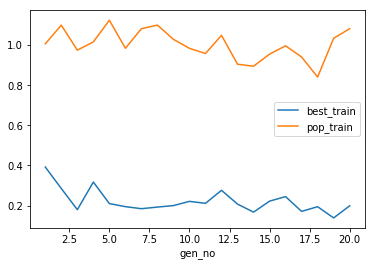

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


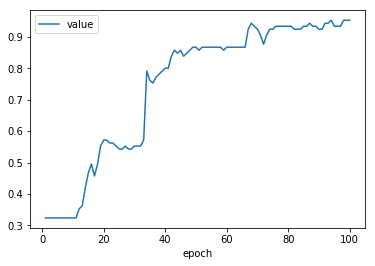

8. EVOLUTION OF THE LOSS OF THE SOLUTION


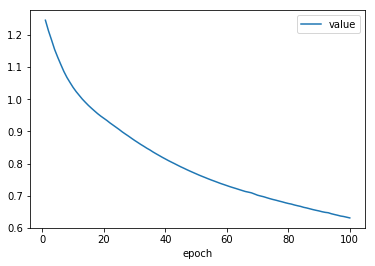

-------------------------------------------------------------------------
----------- STARTING 20 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:5:3
2. ACCURACY OVER THE TRAIN DATA: 0.980952380952381
3. ACCURACY OVER THE VALIDATION DATA: 0.933333337306976
4. ACCURACY OVER THE TEST DATA: 1.0
5. EXECUTION TIME (IN MINUTES) 16.8082212487857
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


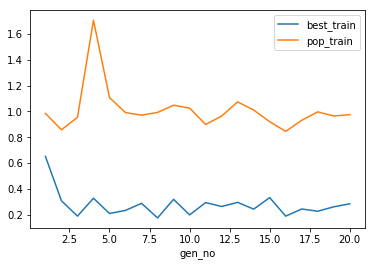

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


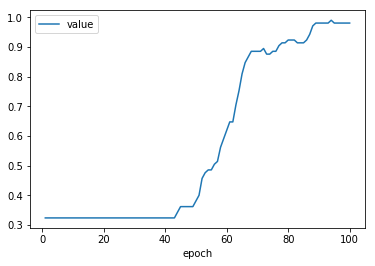

8. EVOLUTION OF THE LOSS OF THE SOLUTION


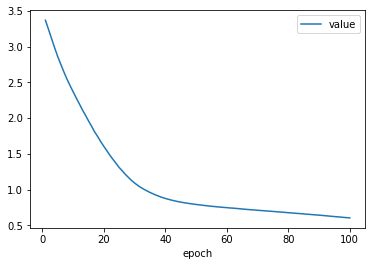

-------------------------------------------------------------------------
----------- STARTING 21 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:9:3
2. ACCURACY OVER THE TRAIN DATA: 0.9714285714285709
3. ACCURACY OVER THE VALIDATION DATA: 0.9666666388511659
4. ACCURACY OVER THE TEST DATA: 1.0
5. EXECUTION TIME (IN MINUTES) 16.1577282309532
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


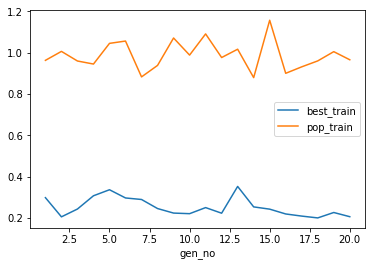

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


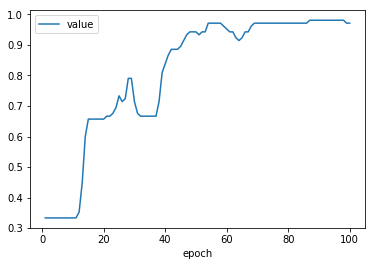

8. EVOLUTION OF THE LOSS OF THE SOLUTION


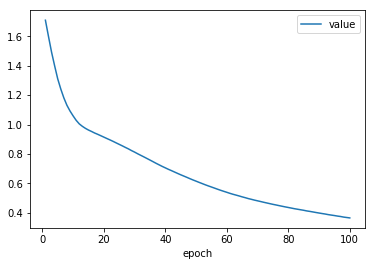

-------------------------------------------------------------------------
----------- STARTING 22 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:5:3
2. ACCURACY OVER THE TRAIN DATA: 0.342857143140974
3. ACCURACY OVER THE VALIDATION DATA: 0.266666680574417
4. ACCURACY OVER THE TEST DATA: 0.400000005960464
5. EXECUTION TIME (IN MINUTES) 16.0723752140999
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


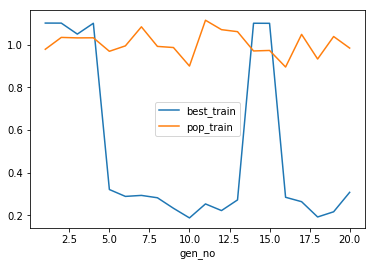

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


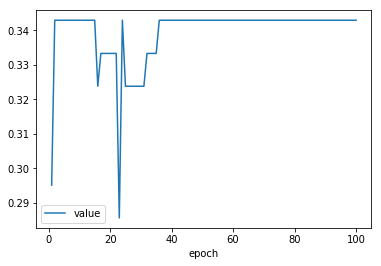

8. EVOLUTION OF THE LOSS OF THE SOLUTION


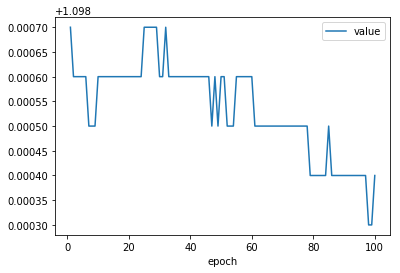

-------------------------------------------------------------------------
----------- STARTING 23 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:7:3
2. ACCURACY OVER THE TRAIN DATA: 0.9714285714285709
3. ACCURACY OVER THE VALIDATION DATA: 0.8999999761581421
4. ACCURACY OVER THE TEST DATA: 1.0
5. EXECUTION TIME (IN MINUTES) 17.032858633995097
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


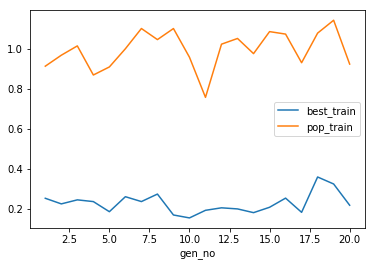

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


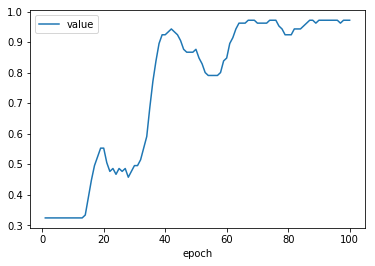

8. EVOLUTION OF THE LOSS OF THE SOLUTION


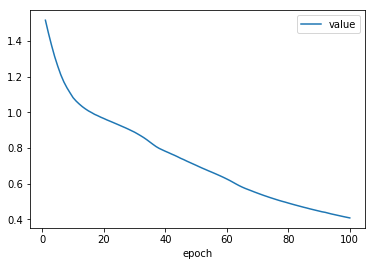

-------------------------------------------------------------------------
----------- STARTING 24 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:12:3
2. ACCURACY OVER THE TRAIN DATA: 0.9714285714285709
3. ACCURACY OVER THE VALIDATION DATA: 0.8999999761581421
4. ACCURACY OVER THE TEST DATA: 1.0
5. EXECUTION TIME (IN MINUTES) 16.539746034145402
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


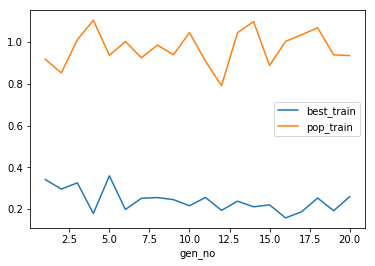

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


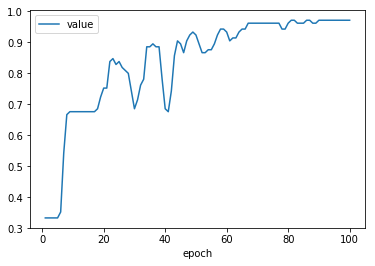

8. EVOLUTION OF THE LOSS OF THE SOLUTION


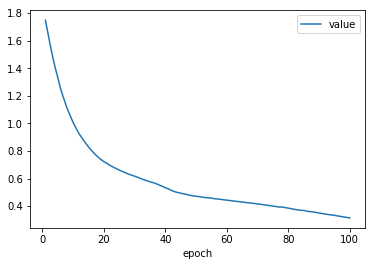

-------------------------------------------------------------------------
----------- STARTING 25 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:4:3
2. ACCURACY OVER THE TRAIN DATA: 0.961904761904762
3. ACCURACY OVER THE VALIDATION DATA: 0.9666666388511659
4. ACCURACY OVER THE TEST DATA: 1.0
5. EXECUTION TIME (IN MINUTES) 16.9664715329806
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


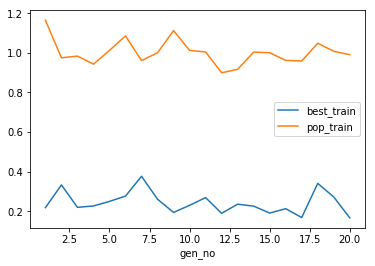

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


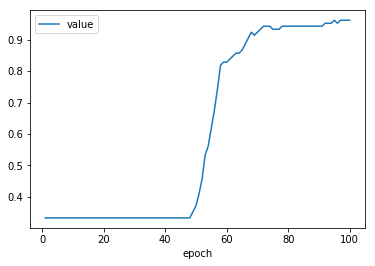

8. EVOLUTION OF THE LOSS OF THE SOLUTION


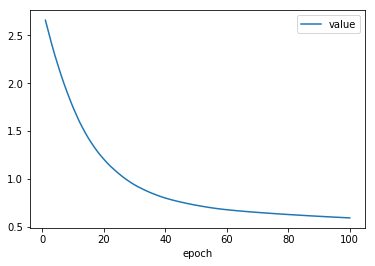

-------------------------------------------------------------------------
----------- STARTING 26 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:8:3
2. ACCURACY OVER THE TRAIN DATA: 0.9523809523809521
3. ACCURACY OVER THE VALIDATION DATA: 0.9666666388511659
4. ACCURACY OVER THE TEST DATA: 1.0
5. EXECUTION TIME (IN MINUTES) 16.4261174678802
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


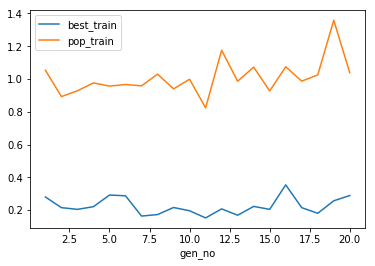

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


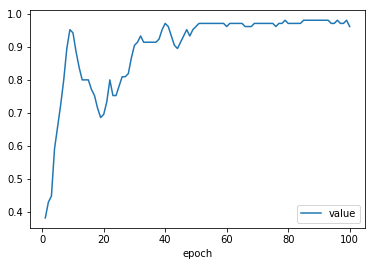

8. EVOLUTION OF THE LOSS OF THE SOLUTION


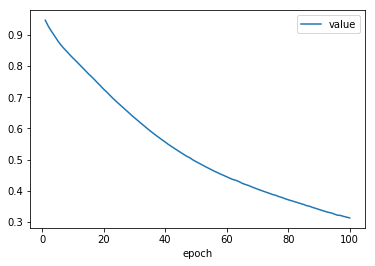

-------------------------------------------------------------------------
----------- STARTING 27 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:4:3
2. ACCURACY OVER THE TRAIN DATA: 0.31428571442763
3. ACCURACY OVER THE VALIDATION DATA: 0.400000005960464
4. ACCURACY OVER THE TEST DATA: 0.266666680574417
5. EXECUTION TIME (IN MINUTES) 17.2727192322413
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


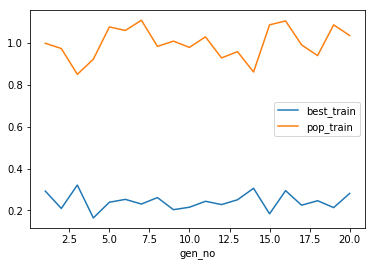

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


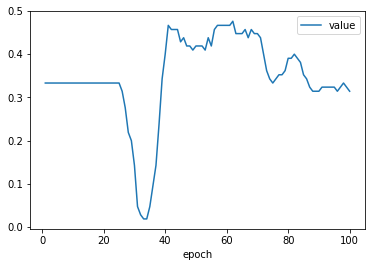

8. EVOLUTION OF THE LOSS OF THE SOLUTION


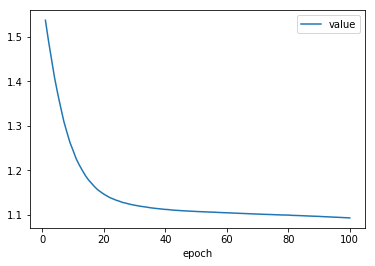

-------------------------------------------------------------------------
----------- STARTING 28 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:3:4:3
2. ACCURACY OVER THE TRAIN DATA: 0.7809523815200441
3. ACCURACY OVER THE VALIDATION DATA: 0.866666674613953
4. ACCURACY OVER THE TEST DATA: 0.8000000119209291
5. EXECUTION TIME (IN MINUTES) 17.4552686174711
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


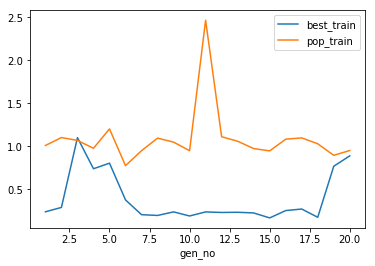

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


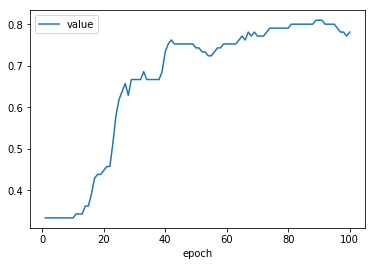

8. EVOLUTION OF THE LOSS OF THE SOLUTION


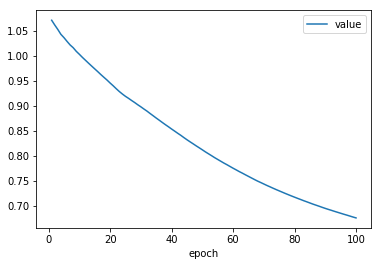

-------------------------------------------------------------------------
----------- STARTING 29 SOLUTION RESULTS VISUALIZATION -----------
-------------------------------------------------------------------------
1. NEURAL NETWORK ARCHITECTURE: 4:2:3:3
2. ACCURACY OVER THE TRAIN DATA: 0.342857143140974
3. ACCURACY OVER THE VALIDATION DATA: 0.266666680574417
4. ACCURACY OVER THE TEST DATA: 0.400000005960464
5. EXECUTION TIME (IN MINUTES) 17.7852758804957
6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)


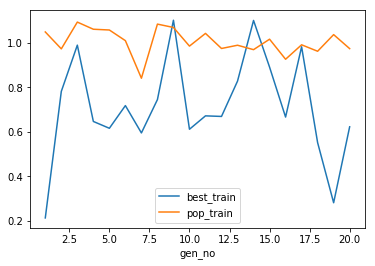

7. EVOLUTION OF THE ACCURACY OF THE SOLUTION


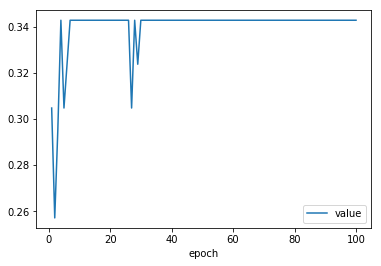

8. EVOLUTION OF THE LOSS OF THE SOLUTION


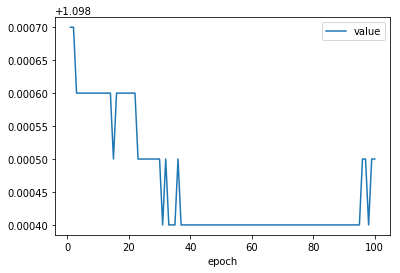

In [4]:
for index, row in results.iterrows():
    print("-------------------------------------------------------------------------")
    print("----------- STARTING", index, "SOLUTION RESULTS VISUALIZATION -----------")
    print("-------------------------------------------------------------------------")
    print("1. NEURAL NETWORK ARCHITECTURE:", row["sol_nn_architecture"])
    print("2. ACCURACY OVER THE TRAIN DATA:", row["sol_train_accuracy"])
    print("3. ACCURACY OVER THE VALIDATION DATA:", row["sol_validation_accuracy"])
    print("4. ACCURACY OVER THE TEST DATA:", row["sol_test_accuracy"])
    print("5. EXECUTION TIME (IN MINUTES)", row["exec_time"])
    print("6. EVOLUTION OF THE POPULATION (population accuracy vs best accuracy)")
    json_o = "[" + row["gp_plot_data"].replace("\\", "").replace("[", "").replace("]", "").replace("}\"", "}").replace("\"{", "{")[:-1] + "]"
    gp_plot_data = pd.DataFrame.from_records(json.loads(json_o), index = "gen_no")
    gp_plot_data.plot()
    plt.show()
    print("7. EVOLUTION OF THE ACCURACY OF THE SOLUTION")
    json_o = row["sol_plot_data"].replace("\\", "").replace("epoch", "\"epoch", 1)[:-1]
    sol_plot_data = json.loads(json_o)
    sol_plot_data_a = pd.DataFrame.from_records([x for x in sol_plot_data if x["metric"] == "acc"], index = "epoch")
    sol_plot_data_e = pd.DataFrame.from_records([x for x in sol_plot_data if x["metric"] == "loss"], index = "epoch")
    sol_plot_data_a.plot()
    plt.show()
    print("8. EVOLUTION OF THE LOSS OF THE SOLUTION")
    sol_plot_data_e.plot()
    plt.show()